# Data Exploration & Preproccessing

## Importing necessary modules

In [3]:
import pandas
import numpy
import re
import nltk
import matplotlib.pyplot as plt
import time
from autocorrect import Speller

from langdetect import detect
from googletrans import Translator

## Datasets Reading

In [5]:
trainData = pandas.read_csv("mediaeval-2015-trainingset.txt", sep="\t")
testData = pandas.read_csv("mediaeval-2015-testset.txt", sep="\t")

#Creating DataFrames for training and testing
df_train = pandas.DataFrame(data = trainData)
df_test = pandas.DataFrame(data = testData)

## Training & Testing Data Characterization

In [24]:
trainData.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [25]:
testData.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake


In [26]:
df_train.shape

(14277, 7)

In [27]:
df_test.shape

(3755, 7)

In [28]:
trainData.describe(include=object)

,tweetText,imageId(s),username,timestamp,label
count,14277,14277,14277,14277,14277
unique,12376,377,13498,13909,3
top,Unbelievable scene flying over #StatenIsland i...,sandyA_fake_29,SAGandAFTRA,Tue Oct 30 00:31:14 +0000 2012,fake
freq,42,1100,16,4,6742


In [29]:
testData.describe(include=object)

,tweetText,imageId(s),username,timestamp,label
count,3755,3755,3755,3755,3755
unique,3706,88,3553,3449,2
top,"J'aime une vidéo @YouTube : ""SYRIA! SYRIAN HER...",syrianboy_1,_WTFVideos,Sat Apr 25 18:05:05 +0000 2015,fake
freq,4,1769,23,13,2546


In [11]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [12]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3755 non-null   int64 
 1   tweetText   3755 non-null   object
 2   userId      3755 non-null   int64 
 3   imageId(s)  3755 non-null   object
 4   username    3755 non-null   object
 5   timestamp   3755 non-null   object
 6   label       3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [13]:
# Checking if any null value in training data
df_train.isnull().sum().sum()

0

In [14]:
# Checking if any null value in testing data
df_test.isnull().sum().sum()

0

#### Covered Events Determination

- we noticed from the images names column that each image is related to a specific event or place. So we will try to represent the covered events and their frequency by image names in training data.

imgs
boston                 546
bringback              131
columbianChemicals     185
elephant                13
livr                     9
malaysia               501
passport                46
pigFish                 14
sandyA                9695
sandyB                2621
sochi                  402
underwater             112
Name: tweetId, dtype: int64


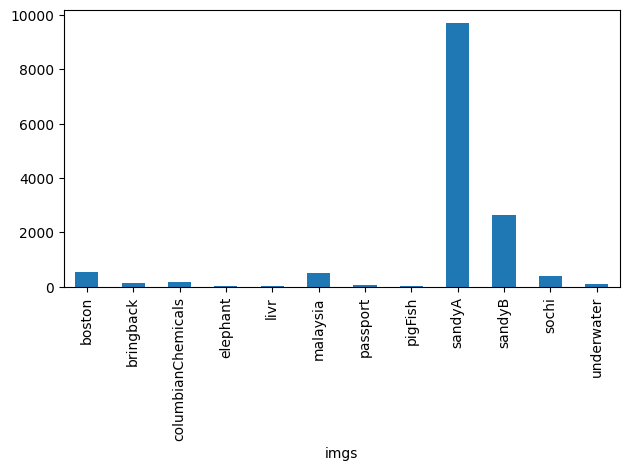

In [72]:
df_train.rename(columns = {'imageId(s)':'imgs'}, inplace = True)
imgCount = df_train.groupby(df_train.imgs.str.split('_').str[0])['tweetId'].nunique()
print (imgCount)

# Plot a bar chart of the frequencies
imgCount.plot(kind='bar')
plt.tight_layout()

- The Covered events for testing data:

imgs
eclipse        277
garissa         77
nepal         1353
samurai        218
syrianboy     1769
varoufakis      61
Name: tweetId, dtype: int64


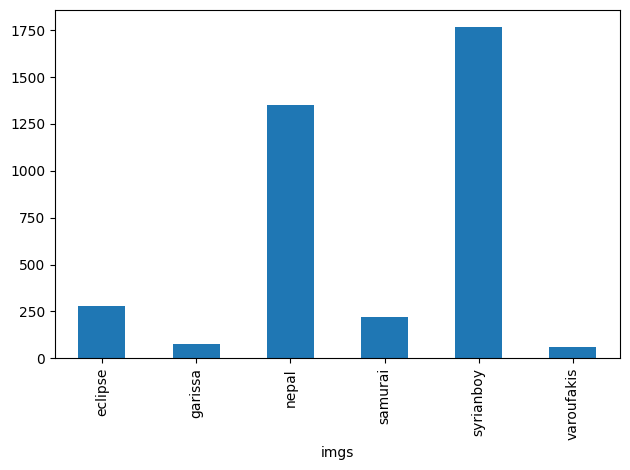

In [73]:
df_test.rename(columns = {'imageId(s)':'imgs'}, inplace = True)
imgCount = df_test.groupby(df_test.imgs.str.split('_').str[0])['tweetId'].nunique()
print (imgCount)

# Plot a bar chart of the frequencies
imgCount.plot(kind='bar')
plt.tight_layout()

#### Count of real & fake labels

fake labels count in training dataset:  6742
humor labels count in training dataset:  2614
real labels count in training dataset:  4921
---------------------------------------------
fake labels count in testing dataset:  2546
humor labels count in testing dataset:  0
real labels count in testing dataset:  1209


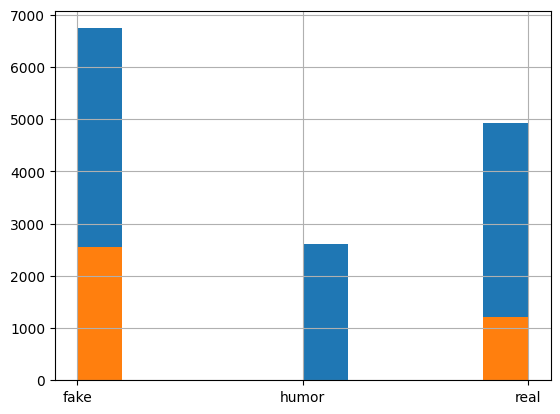

In [30]:
training_fake_labels_count = (df_train.label=='fake').sum()
training_humor_labels_count = (df_train.label=='humor').sum()
training_real_labels_count = (df_train.label=='real').sum()
print('fake labels count in training dataset: ',training_fake_labels_count)
print('humor labels count in training dataset: ',training_humor_labels_count)
print('real labels count in training dataset: ',training_real_labels_count)
training_hist = df_train['label'].hist()
print("-"*45)
testing_fake_labels_count = (df_test.label=='fake').sum()
testing_humor_labels_count = (df_test.label=='humor').sum()
testing_real_labels_count = (df_test.label=='real').sum()
print('fake labels count in testing dataset: ', testing_fake_labels_count)
print('humor labels count in testing dataset: ', testing_humor_labels_count)
print('real labels count in testing dataset: ', testing_real_labels_count)
testing_hist = df_test['label'].hist()

#### Number of different languages found in training & testing datasets

languages of traning dataset:
 en        10965
es         1308
tl          311
fr          217
id          176
pt          156
de          126
so          119
cy          113
it          101
nl           91
ar           79
af           65
ru           61
sv           50
no           36
pl           35
tr           32
ca           30
da           27
ja           20
th           19
fi           13
sk           13
et           12
vi           12
sw           11
zh-cn        10
bg            9
ro            7
ko            6
sl            6
hu            6
hr            6
sq            6
lt            5
el            5
fa            4
cs            2
lv            2
unkown        2
he            1
mk            1
hi            1
Name: tweetText, dtype: int64


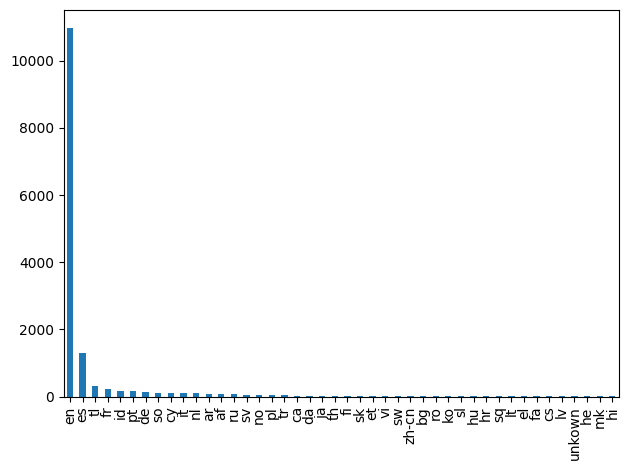

In [75]:
def lang_detect(text):
    try:
        detected_text = detect(text)
        return detected_text
    except:
        return "unkown"
training_languages_count = df_train['tweetText'].apply(lambda x: lang_detect(x))
print('languages of traning dataset:\n', training_languages_count.value_counts())

# Plot a bar chart of the frequencies
training_languages_count.value_counts().plot(kind='bar')
plt.tight_layout()

languages of testing dataset:
 en    2791
so     503
ar     175
es      61
de      41
pt      38
fr      34
nl      21
it      18
tr      12
sq       6
id       6
hi       5
cy       5
ca       5
fi       4
sv       3
el       3
vi       3
th       2
ro       2
ja       2
pl       2
af       2
te       2
tl       2
et       1
ru       1
ko       1
bg       1
ta       1
lt       1
hr       1
Name: tweetText, dtype: int64


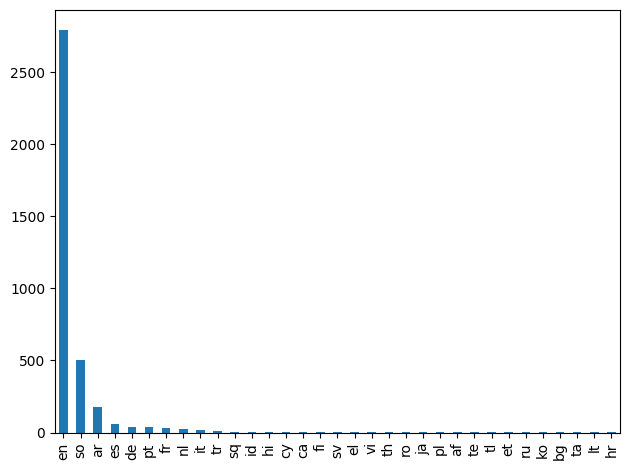

In [76]:
testing_languages_count = df_test['tweetText'].apply(lambda x: lang_detect(x))
print('languages of testing dataset:\n', testing_languages_count.value_counts())

# Plot a bar chart of the frequencies
testing_languages_count.value_counts().plot(kind='bar')
plt.tight_layout()

##### We may need to translate all different languages to English to unify our dataset

#### Tweets Weekdays count

<AxesSubplot: >

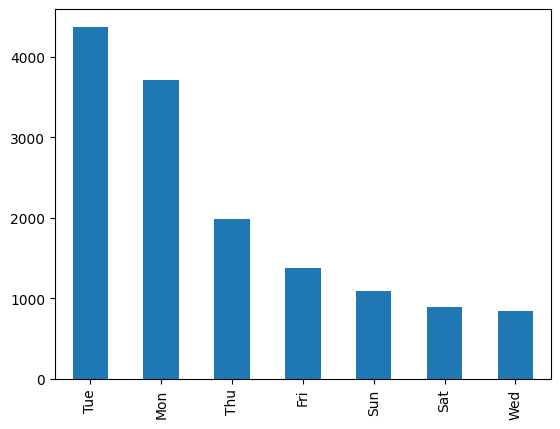

In [32]:
weekdays = df_train['timestamp'].apply(lambda x: x.split()[0])
weekdays.value_counts().plot.bar()

## Data Preproccessing

#### Changing Humor Label to Fake Label

In [7]:
df_train.loc[(df_train.label == 'humor'),'label'] = 'fake'
df_test.loc[(df_test.label == 'humor'),'label'] = 'fake'

#### Removing URLs

In [8]:
def removeURLs(text):
    tweet = re.sub(r'http\S+','', text)
    return tweet

df_train['tweetText']= df_train['tweetText'].apply(lambda x: removeURLs(x))
df_test['tweetText'] = df_test['tweetText'].apply(lambda x: removeURLs(x))

pandas.set_option('display.max_colwidth', None) #allows you to see full fields
df_train['tweetText'].head(10)

0    ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. 
1     @milenagimon: Miren a Sandy en NY!  Tremenda imagen del huracán. Parece el "Día de la Independencia 2"  REAL! RT.
2                      Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy  
3                                                                                            Scary shit #hurricane #NY 
4                                                 My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽 
5                                                                           42nd #time #square #NYC #subway #hurricane 
6                                               Just in time for #halloween a photo of #hurricane #sandy #frankenstorm 
7                                Crazy pic of #Hurricane #Sandy prayers go out to family and friends on the East Coast 
8                                       

#### Preparing for translation

In [9]:
def translate_tweet(text):
    translator = Translator()
    translator.raise_Exception = True
    try:
        translation = translator.translate(text, dest='en').text
        return translation
    except:
        return text

#### Text Cleaning & Translation

In [17]:
#remove non word characters, &amp, new line indicators, convert to same case and translate
def clean_text(tweet):
    tweet = re.sub(r'&\S+', '', tweet) # remove '&amp'
    tweet = tweet.replace("\\n",'') # remove end of line signs '\n'
    tweet = re.sub(r'[^\w\s]','',tweet) # remove non word characters
    tweet = re.sub(r'@\w*', "", tweet) # remove usernames
    tweet = tweet.lower() #convert to lower case
    tweet = re.sub(r'[0-9]','',tweet) #remove numbers
    emojis = re.compile("["
                    u"\U0001F600-\U0001F64F"
                    u"\U0001F300-\U0001F5FF"
                    u"\U0001F680-\U0001F6FF"
                    u"\U0001F1E0-\U0001F1FF"
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+", flags=re.UNICODE)
    tweet = emojis.sub(r'', tweet) if emojis.search(tweet) else tweet # remove emojis
    
    """
    I run the translation function in a separated script so I could track and save the output csv file.
    So, Please don't run translate_tweet() on the whole dataset here, because it'll take too long time.
    """
    # if lang_detect(tweet) != 'en':
    #     tweet = translate_tweet(tweet) #translate to english
    return tweet

In [11]:
entry = df_train.iloc[0]['tweetText']
print('raw data sample: ', entry)
print('after cleaning: ', clean_text(entry))

df_train['cleanText'] = df_train['tweetText'].apply(lambda x: clean_text(x))
df_test['cleanText'] = df_test['tweetText'].apply(lambda x: clean_text(x))
df_train.head()

raw data sample:  ¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy. 
after cleaning:  se acuerdan de la película el día después de mañana me recuerda a lo que está pasando con el huracán sandy 


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanText
0,263046056240115712,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,se acuerdan de la película el día después de mañana me recuerda a lo que está pasando con el huracán sandy
1,262995061304852481,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,milenagimon miren a sandy en ny tremenda imagen del huracán parece el día de la independencia real rt
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,buena la foto del huracán sandy me recuerda a la película día de la independencia id sandy
3,262996108400271360,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny
4,263018881839411200,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,my fave place in the world nyc hurricane sandy statueofliberty


In [19]:
# example to make sure new line actually is removed
df_train.loc[df_train['tweetId'] == 263490059825729537]


,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanText
12167,263490059825729537,this is in dr :((( fuck sandy \n!!!,183529883,sandyB_real_22,Xo_AshleyTaylor,Wed Oct 31 03:58:20 +0000 2012,real,this is in dr fuck sandy


#### Saving cleanText to csv file so we won't have to spend so long time running

In [32]:
# df_train.to_csv('train_tweets_cleaned_.csv',index=False)
# df_test.to_csv('test_tweets_cleaned_.csv',index=False)

#### Retriving cleaned and translated tweets

In [83]:
df_cleaned_train = pandas.read_csv('train_tweets_cleaned_5.csv')
df_cleaned_test = pandas.read_csv('test_tweets_cleaned.csv')
pandas.set_option('display.max_colwidth', None) #allows you to see full fields
df_cleaned_train.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanText
0,2.630000e+17,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,they remember the movie the day after tomorrow it reminds me of what is happening with hurricane sandy
1,2.630000e+17,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,milenagimon look at sandy in ny tremendous image of hurricane seems to the day of real independence rt
2,2.630000e+17,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,good the photo of hurricane sandy reminds me of the movie independence day id sandy
3,2.630000e+17,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny
4,2.630000e+17,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,my fave place in the world nyc hurricane sandy statueofliberty
5,2.630000e+17,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,nd time square nyc subway hurricane
6,2.630000e+17,Just in time for #halloween a photo of #hurricane #sandy #frankenstorm,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,just in time for halloween a photo of hurricane sandy frankenstorm
7,2.630000e+17,Crazy pic of #Hurricane #Sandy prayers go out to family and friends on the East Coast,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,crazy pic of hurricane sandy prayers go out to family and friends on the east coast
8,2.630000e+17,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,sandy newyork hurricane statueofliberty usa
9,2.630000e+17,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,nyc hurricane


#### Removing white spaces

#### Removing Stop Words

In [84]:
stopwords = nltk.corpus.stopwords.words()
stopwords.extend([':', ';', '[', ']', '"', "'", '(', ')', '.', '?', '#', '@', '...'])
df_cleaned_train['cleanText'] = df_cleaned_train['cleanText'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))
df_cleaned_test['cleanText'] = df_cleaned_test['cleanText'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

#### Text Lemmatising

In [85]:
tokeniser = nltk.tokenize.WhitespaceTokenizer()
lemmatiser = nltk.stem.WordNetLemmatizer()
df_cleaned_train['cleanText'] = df_cleaned_train['cleanText'].apply(lambda x: ' '.join([lemmatiser.lemmatize(w) for w in tokeniser.tokenize(x)]))
df_cleaned_test['cleanText'] = df_cleaned_test['cleanText'].apply(lambda x: ' '.join([lemmatiser.lemmatize(w) for w in tokeniser.tokenize(x)]))
df_cleaned_train.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanText
0,2.630000e+17,¿Se acuerdan de la película: “El día después de mañana”? Me recuerda a lo que está pasando con el huracán #Sandy.,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,remember movie day tomorrow reminds happening hurricane sandy
1,2.630000e+17,"@milenagimon: Miren a Sandy en NY! Tremenda imagen del huracán. Parece el ""Día de la Independencia 2"" REAL! RT.",192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,milenagimon sandy ny tremendous image hurricane day real independence rt
2,2.630000e+17,"Buena la foto del Huracán Sandy, me recuerda a la película Día de la Independencia #ID4 #Sandy",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,photo hurricane sandy reminds movie independence day id sandy
3,2.630000e+17,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny
4,2.630000e+17,My fave place in the world #nyc #hurricane #sandy #statueofliberty 🗽,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,fave place world nyc hurricane sandy statueofliberty
5,2.630000e+17,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,time square nyc subway hurricane
6,2.630000e+17,Just in time for #halloween a photo of #hurricane #sandy #frankenstorm,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,time halloween photo hurricane sandy frankenstorm
7,2.630000e+17,Crazy pic of #Hurricane #Sandy prayers go out to family and friends on the East Coast,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,crazy hurricane sandy prayer family friend east coast
8,2.630000e+17,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,sandy newyork hurricane statueofliberty usa
9,2.630000e+17,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,nyc hurricane


#### Correcting Spelling Mistakes

In [ ]:
spell = Speller(lang='en')

"""
I run the translation function in a separated script so I could track and save the output csv file.
So, Please don't run translate_tweet() on the whole dataset here, because it'll take too long time.
"""
def correct_spelling(tweet):
    words = tweet.split()
    return " ".join([spell(item) for item in words])

df_train['cleanText'] = df_train['cleanText'].apply(lambda x: correct_spelling(x))
df_test['cleanText'] = df_test['cleanText'].apply(lambda x: correct_spelling(x))
train_data.head(10)

#### write spell checked cleanText to csv file so won't have to spend so long time running 

In [ ]:
# df_train.to_csv('train_tweets_spellcheck.csv',index=False)
# df_test.to_csv('test_tweets_spellcheck.csv',index=False)

#### Retriving spell checked tweets

In [15]:
df_train = pandas.read_csv('train_tweets_cleaned_spell_checked.csv')
df_test = pandas.read_csv('test_tweets_cleaned_spell_checked_2.csv')
df_train.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanText
0,2.630000e+17,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,they remember the movie the day after tomorrow...
1,2.630000e+17,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,milenagimon look at sandy in ny tremendous ima...
2,2.630000e+17,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,good the photo of hurricane sandy reminds me o...
3,2.630000e+17,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny
4,2.630000e+17,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,my have place in the world nyc hurricane sandy...
5,2.630000e+17,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,nd time square nyc subway hurricane
6,2.630000e+17,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,just in time for halloween a photo of hurrican...
7,2.630000e+17,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,crazy pic of hurricane sandy prayers go out to...
8,2.630000e+17,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,sandy newyork hurricane statueofliberty usa
9,2.630000e+17,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,nyc hurricane


#### Getting frequency count & Removing Dublicates

In [16]:
df_train['frequency'] = df_train['tweetText'].map(df_train['tweetText'].value_counts())
df_train['frequency'].value_counts()
df_train.drop_duplicates(subset=['tweetText'], keep='first', inplace=True)
df_train.shape

(11752, 9)

#### Removing White Spaces

In [17]:
df_train['cleanText'] = df_train['cleanText'].apply(lambda text: " ".join(text.split()))
df_train.head(10)

,tweetId,tweetText,userId,imageId(s),username,timestamp,label,cleanText,frequency
0,2.630000e+17,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,they remember the movie the day after tomorrow...,1
1,2.630000e+17,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,milenagimon look at sandy in ny tremendous ima...,1
2,2.630000e+17,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,good the photo of hurricane sandy reminds me o...,1
3,2.630000e+17,Scary shit #hurricane #NY,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,scary shit hurricane ny,1
4,2.630000e+17,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,my have place in the world nyc hurricane sandy...,1
5,2.630000e+17,42nd #time #square #NYC #subway #hurricane,163674788,sandyA_fake_23,classycg,Tue Oct 30 19:39:10 +0000 2012,fake,nd time square nyc subway hurricane,1
6,2.630000e+17,Just in time for #halloween a photo of #hurric...,246153081,sandyA_fake_14,j_unit87,Mon Oct 29 14:41:04 +0000 2012,fake,just in time for halloween a photo of hurrican...,1
7,2.630000e+17,Crazy pic of #Hurricane #Sandy prayers go out ...,199565482,sandyA_fake_29,MrBlakMagik,Tue Oct 30 16:46:52 +0000 2012,fake,crazy pic of hurricane sandy prayers go out to...,1
8,2.630000e+17,#sandy #newyork #hurricane #statueofliberty #USA,78475739,sandyA_fake_15,safi37,Tue Oct 30 02:54:46 +0000 2012,fake,sandy newyork hurricane statueofliberty usa,1
9,2.630000e+17,#nyc #hurricane,869777653,sandyA_fake_29,kingmichael03,Mon Oct 29 17:59:59 +0000 2012,fake,nyc hurricane,1


## Training Algorithms

#### Importing neccessary modules

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import seaborn as sn

#### Define features and target for training and testing

In [19]:
tar_train = df_train.label
ft_train = df_train.cleanText
tar_test = df_test.label
ft_test = df_test.cleanText

#### Using TF-IDF For Feature Extraction

In [20]:
tfidf_vectoriser = TfidfVectorizer(stop_words='english', max_df=0.2)
tfidf_train = tfidf_vectoriser.fit_transform(ft_train)
tfidf_test = tfidf_vectoriser.transform(ft_test)

#### Analysis Visualization Helper Method

In [36]:
def analysis(trueY, predY):
    score = metrics.accuracy_score(trueY, predY)
    precision = metrics.precision_score(trueY, predY, pos_label="real")
    recall = metrics.recall_score(trueY, predY, pos_label="real")
    f1_score = metrics.f1_score(trueY, predY, pos_label="real")
    cm = metrics.confusion_matrix(trueY, predY)
    df_cm = pandas.DataFrame(cm, ["fake","real"], ["fake","real"])
    sn.set(font_scale=1.4) # for label size
    ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d') # font size
    ax.set(xlabel='True Value', 
           ylabel='Predicted Value')
    print("accuracy:   %0.3f" % score)
    print("Precison:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("Confusion matrix")
    plt.show()

#### Algorithm #1: MultinomialNB

accuracy:   0.628
Precison: 0.45280161534578495
Recall: 0.7419354838709677
F1 Score: 0.5623824451410658
Confusion matrix


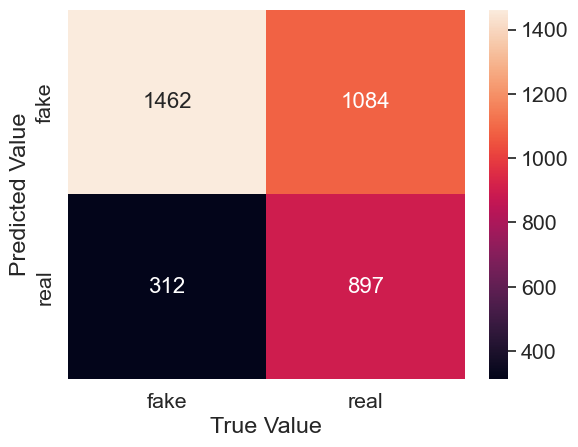

In [44]:
multinomailNB_clf = MultinomialNB()
multinomailNB_clf.fit(tfidf_train, tar_train)
multinomailNB_pred = clf.predict(tfidf_test)

analysis(tar_test, multinomailNB_pred)

#### Algorithm #2: DecisionTreeClassifier

accuracy:   0.654
Precison: 0.3521594684385382
Recall: 0.08767576509511993
F1 Score: 0.14039735099337747
Confusion matrix


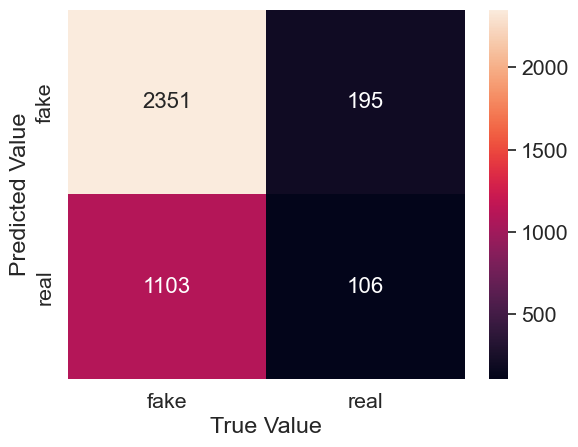

In [39]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(tfidf_train, tar_train)
tree_pred = tree_clf.predict(tfidf_test)

analysis(tar_test, tree_pred)

#### Algorithm #3: RandomForestClassifier

accuracy:   0.662
Precison: 0.3132530120481928
Recall: 0.043010752688172046
F1 Score: 0.07563636363636364
Confusion matrix


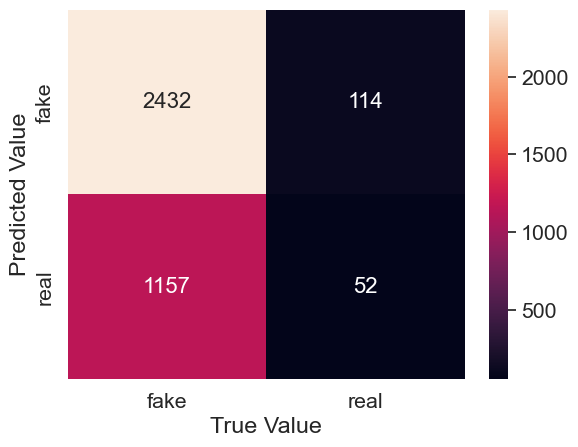

In [42]:
rfc_clf = RandomForestClassifier()
rfc_clf.fit(tfidf_train, tar_train)
rfc_pred = rfc_clf.predict(tfidf_test)

analysis(tar_test, rfc_pred)

#### Algorithm #4: KNeighborsClassifier

accuracy:   0.674
Precison: 0.1
Recall: 0.0016542597187758478
F1 Score: 0.0032546786004882017
Confusion matrix


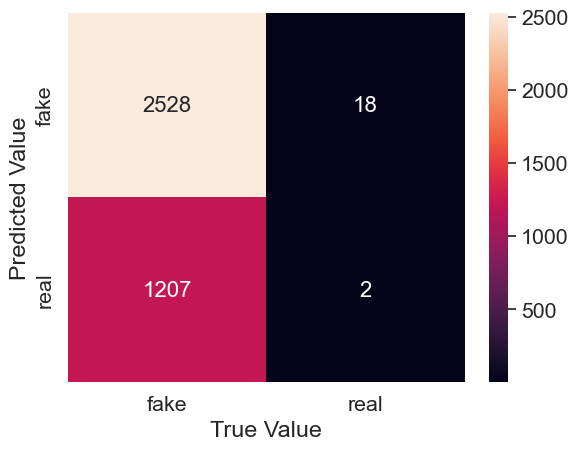

In [49]:
kn_clf = KNeighborsClassifier(n_neighbors=7)
kn_clf.fit(tfidf_train, tar_train)
knn_pred = kn_clf.predict(tfidf_test)

analysis(tar_test, knn_pred)

#### Algorithm #5: LogisticRegressionCV

accuracy:   0.860
Precison: 0.8250950570342205
Recall: 0.717948717948718
F1 Score: 0.7678018575851394
Confusion matrix


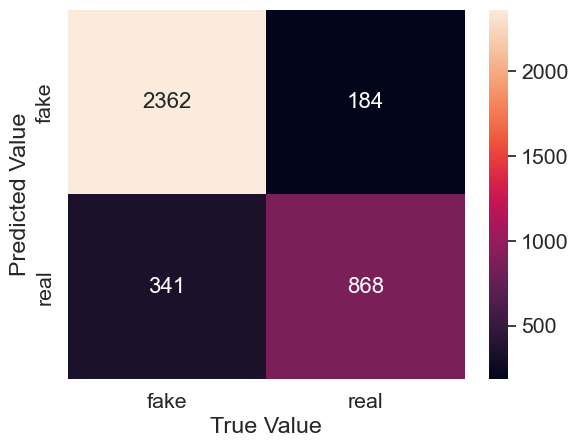

In [53]:
lg_clf = LogisticRegressionCV(cv=5, random_state=0, dual=False, max_iter=7600)
lg_clf.fit(tfidf_train, tar_train)
lg_pred = lg_clf.predict(tfidf_test)

analysis(tar_test, lg_pred)